In [2]:
import torch
import numpy as np
np.set_printoptions(precision=3)

In [3]:
a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)

In [4]:
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

In [5]:
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [8]:
t_ones = torch.ones(2,3)
t_ones.shape

torch.Size([2, 3])

In [9]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [10]:
t_rand = torch.rand(2,3)
print(t_rand)

tensor([[0.7335, 0.8399, 0.8170],
        [0.2361, 0.4357, 0.3898]])


In [13]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [15]:
t = torch.rand(3,5)
t_tr = torch.transpose(t,0,1)
print(t.shape, ' -- to --> ', t_tr.shape)

torch.Size([3, 5])  -- to -->  torch.Size([5, 3])


In [16]:
t = torch.zeros(30)
t_reshape = t.reshape(5,6)
print(t.shape, ' -- to --> ', t_reshape.shape)

torch.Size([30])  -- to -->  torch.Size([5, 6])


In [18]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t,2)
print(t.shape, ' -- to --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -- to -->  torch.Size([1, 2, 4, 1])


### Linear Regression

In [20]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from scipy.special import expit

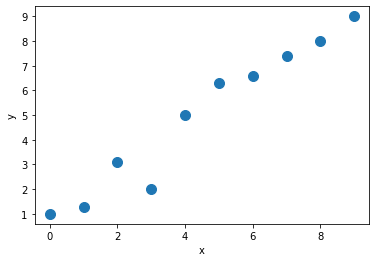

In [21]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [22]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [35]:
SEED = 42

In [36]:
torch.manual_seed(SEED)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
def model(xb):
    return xb @ weight + bias #Lin Reg
def loss_fn(input,target):
    return (input-target).pow(2).mean() #MSE

In [38]:
lr_start = 0.001
epochs = 200
log_epochs = 10

for epoch in range(epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        with torch.no_grad():
            weight -= weight.grad * lr_start
            bias -= bias.grad * lr_start
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}   Loss {loss.item():.4f}')

Epoch 0   Loss 0.3407
Epoch 10   Loss 2.2671
Epoch 20   Loss 0.8556
Epoch 30   Loss 0.0813
Epoch 40   Loss 0.2612
Epoch 50   Loss 0.0664
Epoch 60   Loss 0.0273
Epoch 70   Loss 0.0111
Epoch 80   Loss 2.3934
Epoch 90   Loss 0.7679
Epoch 100   Loss 0.0083
Epoch 110   Loss 0.2614
Epoch 120   Loss 0.0660
Epoch 130   Loss 0.0402
Epoch 140   Loss 0.0410
Epoch 150   Loss 0.0689
Epoch 160   Loss 0.2397
Epoch 170   Loss 0.0062
Epoch 180   Loss 0.0746
Epoch 190   Loss 0.0745


Final Parameters: 2.705873727798462 4.968332767486572


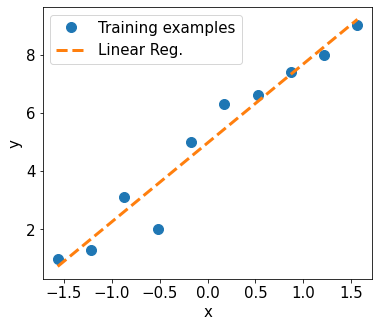

In [39]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
plt.show()

### Torch.nn and Torch.optim

In [40]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=lr_start)

In [41]:
for epoch in range(epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch) #1. generate predictions
        loss = loss_fn(pred, y_batch) #2. calculate loss
        loss.backward() #3. compute gradients
        optimizer.step() #4 update params using gradients
        optimizer.zero_grad() #5 reset gradients to zero

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}   Loss {loss.item():.4f}')

/Users/niekvanderzwaag/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0   Loss 0.4153
Epoch 10   Loss 21.6644
Epoch 20   Loss 3.1557
Epoch 30   Loss 6.4884
Epoch 40   Loss 0.0071
Epoch 50   Loss 3.5046
Epoch 60   Loss 1.1369
Epoch 70   Loss 2.7593
Epoch 80   Loss 3.2163
Epoch 90   Loss 1.2929
Epoch 100   Loss 0.9294
Epoch 110   Loss 0.6181
Epoch 120   Loss 1.7026
Epoch 130   Loss 0.0886
Epoch 140   Loss 0.0969
Epoch 150   Loss 2.0167
Epoch 160   Loss 0.0008
Epoch 170   Loss 0.1152
Epoch 180   Loss 0.1350
Epoch 190   Loss 0.0008


Final Parameters: 2.6588027477264404 4.892544746398926


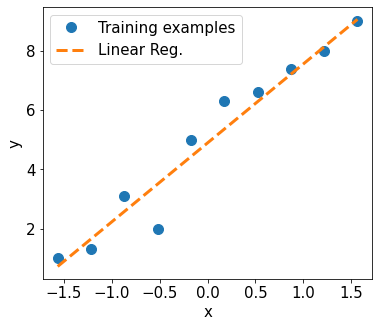

In [42]:
print('Final Parameters:', model.weight.item(), model.bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
plt.show()